In [129]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from config import api_key
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
import datetime
%matplotlib inline

In [130]:
#Better Way to Get S&P 500 Data:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

start_sp = datetime.datetime(1989, 1, 1)
end_sp = datetime.datetime(2019, 3, 31)

end_of_last_year = datetime.datetime(2017, 12, 29)

yf.pdr_override()
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_sp,
                             end_sp)
    
sp500.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000
1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000
1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000
1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000
1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000


In [131]:
spx = sp500

In [132]:
spx = spx.reset_index().set_index('Date', drop=False)
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 1989-01-03 to 2019-03-29
Data columns (total 7 columns):
Date         7620 non-null datetime64[ns]
Open         7620 non-null float64
High         7620 non-null float64
Low          7620 non-null float64
Close        7620 non-null float64
Adj Close    7620 non-null float64
Volume       7620 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 476.2 KB


In [133]:
#Create Volume Weighted Moving Average Column with a Rolling Period of 20 Days
rp = 20

spx['vwma'] = (spx['Close'] * spx['Volume']).rolling(rp).sum() / spx['Volume'].rolling(rp).sum()

In [134]:
#Create 2004 - 2018 DataFrame to match other DataFrames
start_date = '2004-01-01'
end_date = '2018-12-31'

dates = spx['Date'].between(start_date, end_date, inclusive=True)

#New DataFrame
spx04 = spx[dates].reset_index(drop=True)

In [135]:
spx.head()
spx.tail()
spx.info()

,Date,Open,High,Low,Close,Adj Close,Volume,vwma
Date,,,,,,,,
1989-01-03,1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000,NaN
1989-01-04,1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000,NaN
1989-01-05,1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000,NaN
1989-01-06,1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000,NaN
1989-01-09,1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,vwma
Date,,,,,,,,
2019-03-25,2019-03-25,2796.01,2809.79,2785.02,2798.36,2798.36,3376580000,2799.470000
2019-03-26,2019-03-26,2812.66,2829.87,2803.99,2818.46,2818.46,3266050000,2800.546354
2019-03-27,2019-03-27,2819.72,2825.56,2787.72,2805.37,2805.37,3372930000,2801.164449
2019-03-28,2019-03-28,2809.40,2819.71,2798.77,2815.44,2815.44,3158170000,2802.746174
2019-03-29,2019-03-29,2828.27,2836.03,2819.23,2834.40,2834.40,3740700000,2804.282655


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 1989-01-03 to 2019-03-29
Data columns (total 8 columns):
Date         7620 non-null datetime64[ns]
Open         7620 non-null float64
High         7620 non-null float64
Low          7620 non-null float64
Close        7620 non-null float64
Adj Close    7620 non-null float64
Volume       7620 non-null int64
vwma         7601 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 535.8 KB


In [136]:
spx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,vwma
Date,,,,,,,,
1989-01-03,1989-01-03,277.72,277.72,273.81,275.31,275.31,128500000,NaN
1989-01-04,1989-01-04,275.31,279.75,275.31,279.43,279.43,149700000,NaN
1989-01-05,1989-01-05,279.43,281.51,279.43,280.01,280.01,174040000,NaN
1989-01-06,1989-01-06,280.01,282.06,280.01,280.67,280.67,161330000,NaN
1989-01-09,1989-01-09,280.67,281.89,280.32,280.98,280.98,163180000,NaN


In [137]:
#Collapse 2004 - 2018 DataFrame on Month
spx04 = spx04.resample('M', on='Date').agg({'Close': 'last', 'Volume': 'sum'}).reset_index()
spx04.head()

,Date,Close,Volume
0,2004-01-31,1131.13,32820000000
1,2004-02-29,1144.94,27985600000
2,2004-03-31,1126.21,33597900000
3,2004-04-30,1107.30,31611900000
4,2004-05-31,1120.68,29326400000


In [138]:
#Exploring Moving Averages - 20 Day Moving Average of Daily S&P Closing Price
rm = 20

def find_MA_mean(df_close, rm):
    
    return df_close.rolling(rm).mean()

def find_MA_std(df_close, rm):
    
    return df_close.rolling(rm).std()

spx20day_mean = find_MA_mean(spx['Close'], rm)
spx20day_std = find_MA_std(spx['Close'], rm)

In [139]:
#Exploring Moving Addresses - 100 Day Moving Average of Daily S&P Closing Price
rm = 100

def find_MA_mean(df_close, rm):
    
    return df_close.rolling(rm).mean()

def find_MA_std(df_close, rm):
    
    return df_close.rolling(rm).std()

spx100day_mean = find_MA_mean(spx['Close'], rm)
spx100day_std = find_MA_std(spx['Close'], rm)

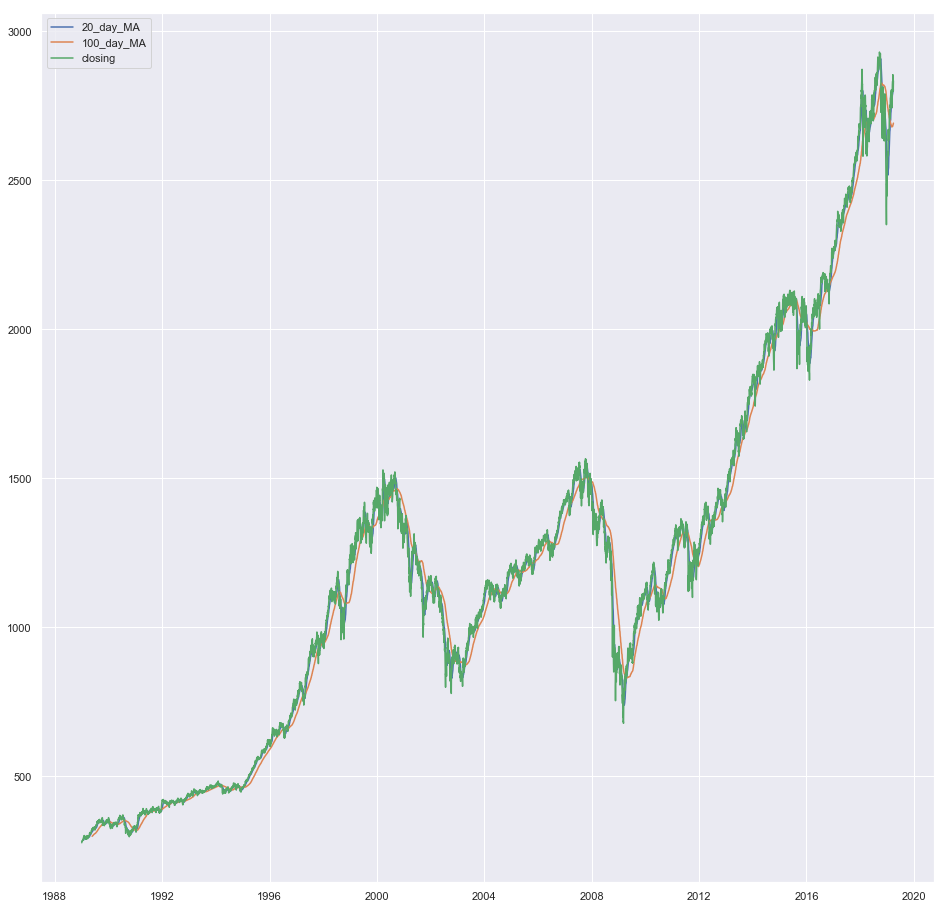

In [140]:
sns.set()
x = spx['Date']

plt.figure(figsize=(16,16))

plt.plot(x, spx20day_mean)
plt.plot(x, spx100day_mean)
plt.plot(x, spx['Close'])

plt.legend(['20_day_MA', '100_day_MA', 'closing'], loc='upper left')


plt.show();

In [141]:
sp500_m = spx.resample('M', on='Date').agg({'Close': 'last', 'Volume': 'sum', 'vwma': 'last'})

In [142]:
sp500_m.head()

,Close,Volume,vwma
Date,,,
1989-01-31,297.47,3532220000,286.496831
1989-02-28,288.86,3216280000,294.511309
1989-03-31,294.87,3504530000,293.278328
1989-04-30,309.64,3237250000,302.571510
1989-05-31,320.52,3747320000,314.824440


In [143]:
sp500_m['vwma_delta'] = (sp500_m['vwma'] - sp500_m['vwma'].shift(1)) / sp500_m['vwma'].shift(1)

In [144]:
sp500_m['volume_delta2'] = (sp500_m['vwma_delta'] - sp500_m['vwma_delta'].shift(1))

In [145]:
sp500_m = sp500_m.reset_index()
sp500_m.head()
sp500_m.tail()

,Date,Close,Volume,vwma,vwma_delta,volume_delta2
0,1989-01-31,297.47,3532220000,286.496831,NaN,NaN
1,1989-02-28,288.86,3216280000,294.511309,0.027974,NaN
2,1989-03-31,294.87,3504530000,293.278328,-0.004187,-0.032161
3,1989-04-30,309.64,3237250000,302.571510,0.031687,0.035874
4,1989-05-31,320.52,3747320000,314.824440,0.040496,0.008809


,Date,Close,Volume,vwma,vwma_delta,volume_delta2
358,2018-11-30,2760.17,80080110000,2725.576009,-0.010620,0.040456
359,2018-12-31,2506.85,83519570000,2575.203278,-0.055171,-0.044551
360,2019-01-31,2704.10,80391630000,2612.529856,0.014495,0.069666
361,2019-02-28,2784.49,70183430000,2751.844390,0.053326,0.038831
362,2019-03-31,2834.40,78596280000,2804.282655,0.019056,-0.034270


In [146]:
sp500_m = sp500_m[(sp500_m['Date'] > '2004-01-01') & (sp500_m['Date'] < '2018-01-01')]

In [147]:
export_csv = sp500_m.to_csv (r'/Users/maks_p/Flatiron/PROJECT/momentum_sentiment_FINAL/04_18_withVWMA.csv', index = None)